In [62]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
def load_f_mnist(path, kind="train"):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte.gz" % kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte.gz" % kind)

    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

#Hledur mnist gagnasettid
#hafid path sem toma strenginn ef skrain er i somu moppu og tid erud ad vinna i
def load_mnist(path, kind="train"):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "mnist_%s-labels-idx1-ubyte.gz" % kind)
    images_path = os.path.join(path, "mnist_%s-images-idx3-ubyte.gz" % kind)
    #labels_path = os.path.join(path, "t10k-labels-idx1-ubyte.gz")
    #images_path = os.path.join(path, "t10k-images-idx3-ubyte.gz")

    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [64]:
X, labels = load_mnist("./gogn") #mnist
X_f, labels_f = load_f_mnist("./gogn")  #fashion mnsist

In [65]:
def plot_one(X, i):
    one_image = X[i].reshape(28, 28)  # Use index 'i' to select the image
    plt.figure()
    plt.imshow(one_image, cmap="gray")
    plt.show()


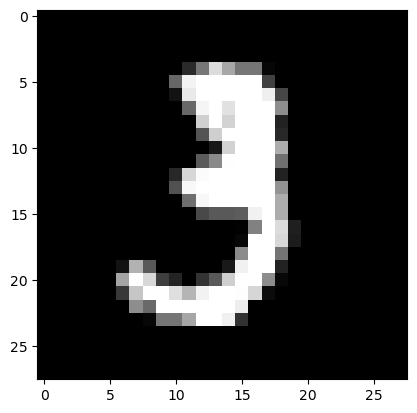

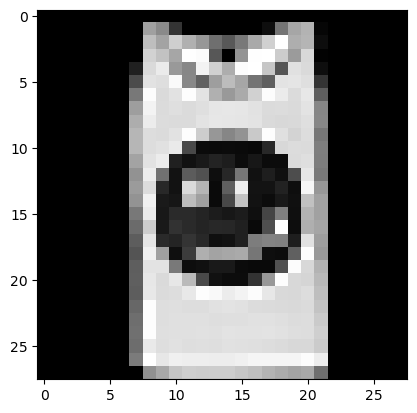

In [66]:
plot_one(X,10)
plot_one(X_f,101)

In [67]:
def run_kmeans(data, k, max_iter=100):

    def assign(data, centroids):

        assignments = np.zeros(data.shape[0])

        for i in range(data.shape[0]):

            distances = np.linalg.norm(data[i] - centroids, axis=1)

            assignments[i] = np.argmin(distances)

        return assignments

    def update(data, assignments, centroids):

        new_centroids = np.zeros((k, data.shape[1]))

        for i in range(k):

            assigned_data = data[assignments == i]

            if len(assigned_data) > 0:

                new_centroids[i] = np.mean(assigned_data, axis=0)

        return new_centroids

    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iter):

        assignments = assign(data, centroids)

        centroids = update(data, assignments, centroids)


    return assignments


In [68]:
# her erum vid ad keyra kmeans a fashion mnist gagnasettid
#assignments = run_kmeans(X_f,10)
assignments_orig = run_kmeans(X,10)

In [ ]:
"""def plot_result(X,clust, output):
    plt.figure(figsize=(20, 20))
    for i in range(1, 101):
        plt.subplot(10, 10, i)
        plt.imshow(X[np.where(output == clust)][i].reshape(28, 28), cmap=plt.cm.binary)
        plt.show()
"""       
        
def plot_result(X, clust, output):
    # Determine the number of images in the cluster
    cluster_indices = np.where(output == clust)[0]
    n_images = min(len(cluster_indices), 100)  # Display up to 100 images
    
    # Calculate the grid size
    rows = int(np.sqrt(n_images))
    cols = (n_images + rows - 1) // rows  # Ensure enough columns to display all images
    
    # Create the plot
    plt.figure(figsize=(cols * 2, rows * 2))
    for idx, i in enumerate(cluster_indices[:n_images]):
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.axis('off')  # Hide the axis
    plt.tight_layout()
    plt.show()

In [ ]:
#her eru fyrstu 100 stokin sem vid reikniritið mitt flokkaði i flokk 2.
# sjaum að þetta er líklegast kjóla flokkurinn en eitthvað af bolum og buxum hafa dottið með. Smá óhjákvæmilegt.
#plot_result(X_f,2,assignments)

In [ ]:
#her eru fyrstu 100 stokin sem vid reikniritið mitt flokkaði i flokk 3 i upprunalega mnist (tölurnar þeas).
# sjaum að þetta er talan 6. Hinsvegar hafa laumast inn einn tvistur og nokkrir fjarkar og slíkt. Samt nokkuð gott. 
plot_result(X,3,assignments_orig)

Flokkar stemma ekki endilega milli labela, sem er rétta svarið og svo assignments hjá okkur. Þeas við gætum sett alla tvista í flokk 2 en í labels(rétta svarinu) er það í flokk 5. Við þurfum því aðeins að umrita. Hvernig getum við synt hversu nákvæmt líkanið okkar er. Úthlutum hverjum flokk í giskinu okkar, assignments hér að ofan

In [ ]:
#ef assignments eru lokagiskid okkar og labels eru retta svarid sem vid faum tegar vid tokum inn gognin
#og cat er einhver flokkur 
#tetta fall tetta fall okkur besta gisk a hvada flokkur tetta er i labels.
def get_real_category(assignment,labels,cat):
    a = labels[np.where(assignment==cat)]
    unique, counts = np.unique(a, return_counts=True)
    return dict(zip(unique, counts))

In [ ]:
d = get_real_category(assignments_orig,labels,1)
#d = get_real_category(assignments,labels,1)
print(d)

In [ ]:
#Sjaum ad ofan ad okkar flokkur 1 er i raunveruleikanum flokkur 8.
#sem tydir ad vid flokkum í flokk 1 með um 72% nákvæmni
d[8]/sum(d.values())

Við flokkum í flokk 1 með um 72% nákvæmni. Sem ef má sjá að neðan stemmir því þetta er "raunverulega" flokkur 8. Það fylgja einhverjir, ásar, fimmur og þristar með.

In [ ]:
plot_result(X,1,assignments_orig)
#plot_result(X,1,assignments)